In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_id = test['id']

# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
train.isnull().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

## Keywords

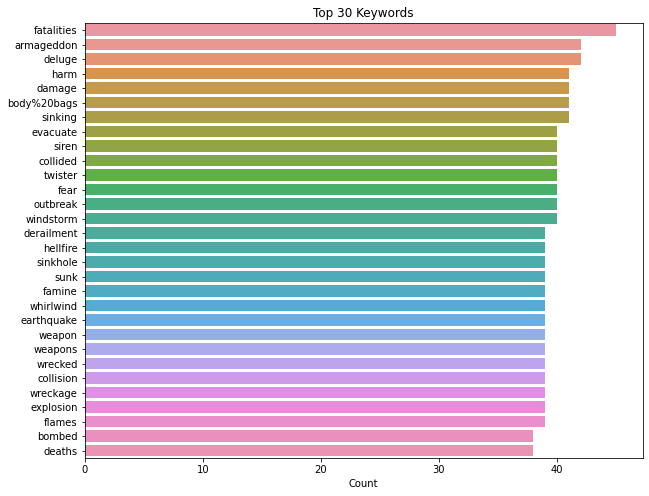

In [8]:
keywords = pd.DataFrame({"Count": train["keyword"].value_counts()})
plt.figure(figsize=(10,8))
sns.barplot(y=keywords[0:30].index, x=keywords[0:30]["Count"], orient='h')
plt.title("Top 30 Keywords")
plt.show()

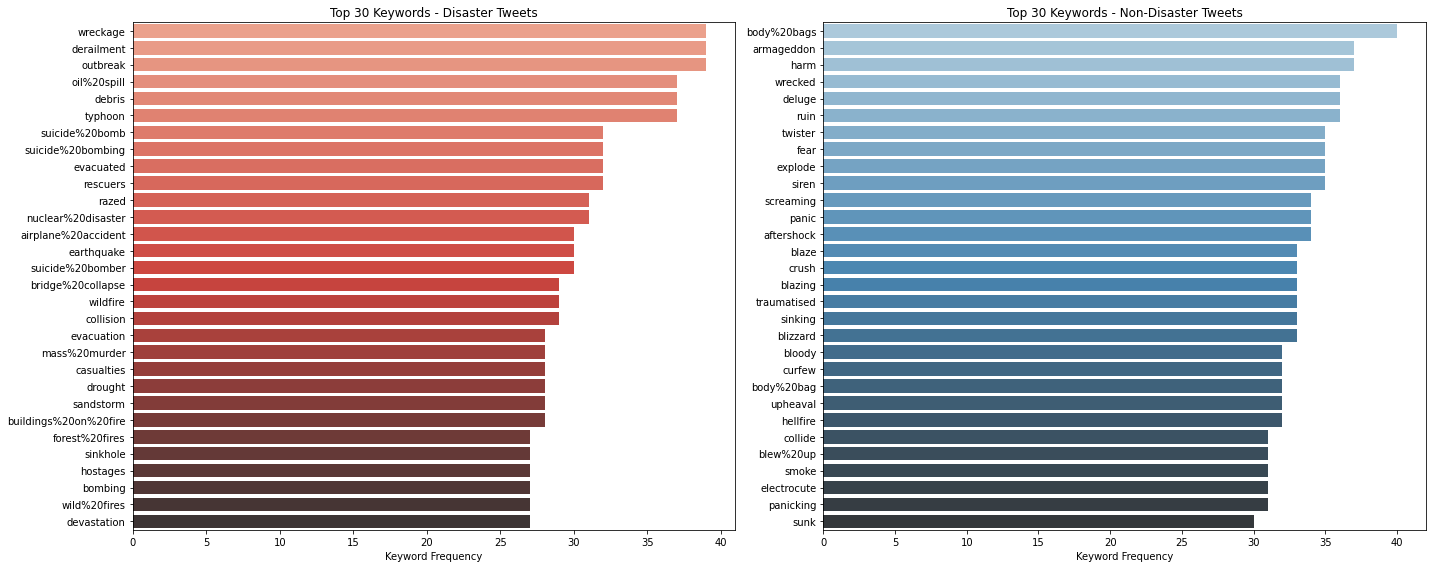

In [9]:
disaster_keywords = train[train['target']==1]['keyword'].value_counts()
nondisaster_keywords = train[train['target']==0]['keyword'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:30].index, x=disaster_keywords[0:30], orient='h', ax=ax[0], palette="Reds_d")
sns.barplot(y=nondisaster_keywords[0:30].index, x=nondisaster_keywords[0:30], orient='h', ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 30 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 30 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

In [10]:
def keyword_disaster_probabilities(x):
    tweets_w_keyword = np.sum(train["keyword"].fillna("").str.contains(x))
    tweets_w_keyword_disaster = np.sum(train["keyword"].fillna("").str.contains(x) & train["target"] == 1)
    return tweets_w_keyword_disaster / tweets_w_keyword

keywords["Disaster_Probability"] = keywords.index.map(keyword_disaster_probabilities)
keywords.head()

,Count,Disaster_Probability
fatalities,45,0.577778
armageddon,42,0.119048
deluge,42,0.188406
harm,41,0.097561
damage,41,0.463415


In [11]:
# Most probable disaster keywords
keywords.sort_values(by='Disaster_Probability',ascending=False).head(10)

,Count,Disaster_Probability
wreckage,39,1.000000
debris,37,1.000000
derailment,39,1.000000
outbreak,40,0.975000
oil%20spill,38,0.973684
typhoon,38,0.973684
suicide%20bombing,33,0.969697
suicide%20bomber,31,0.967742
bombing,29,0.951613
suicide%20bomb,35,0.949495


In [12]:
# Least probable disaster keywords
keywords.sort_values(by='Disaster_Probability',ascending=True).head(10)

,Count,Disaster_Probability
aftershock,34,0.000000
body%20bags,41,0.024390
ruin,37,0.027027
blazing,34,0.029412
screaming,36,0.055556
traumatised,35,0.057143
panicking,33,0.060606
blew%20up,33,0.060606
blight,32,0.062500
body%20bag,33,0.065421


## Locations

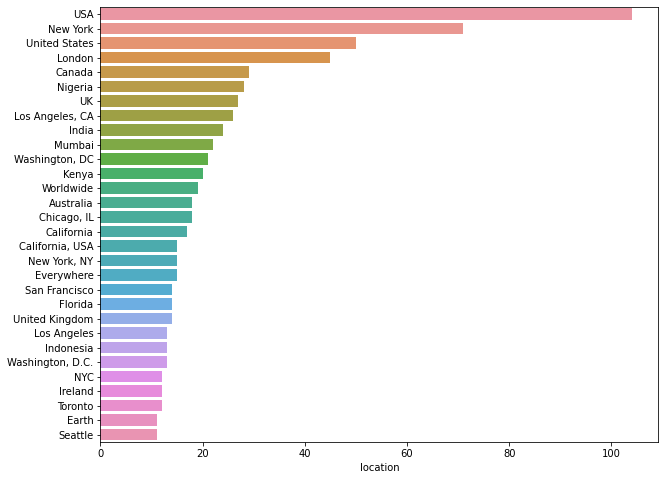

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x=train['location'].value_counts()[:30],y=train['location'].value_counts()[:30].index)
plt.show()

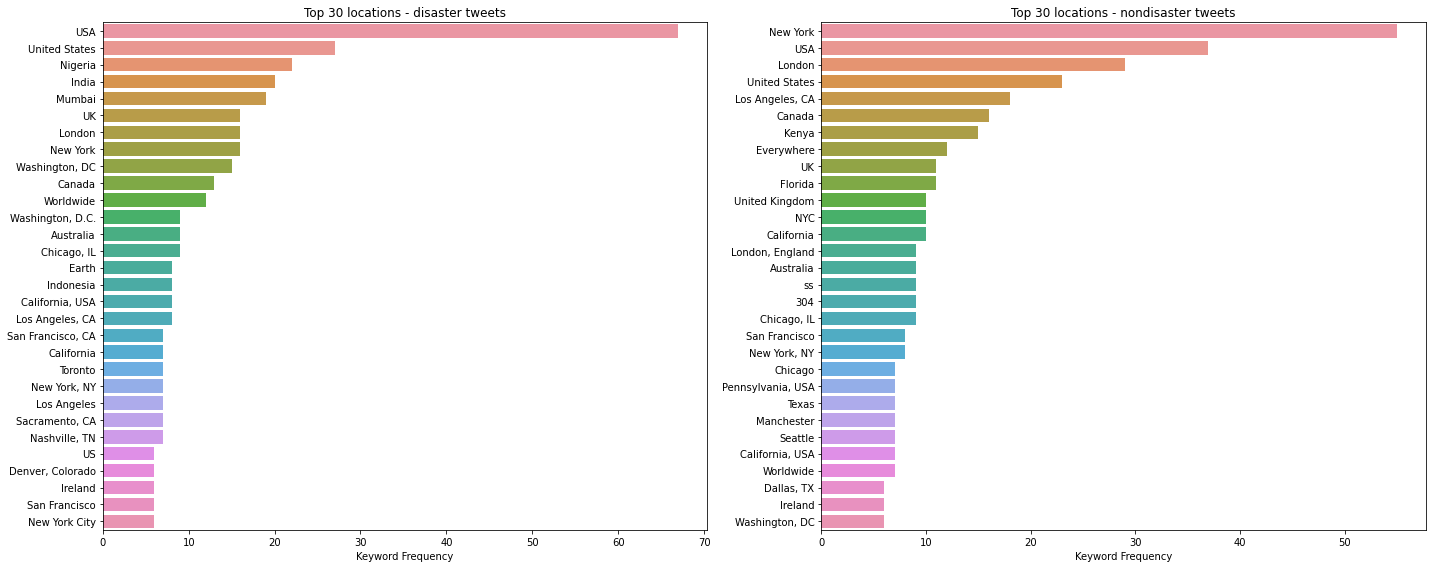

In [14]:
disaster_locations = train[train['target']==1]['location'].value_counts()
nondisaster_locations = train[train['target']==0]['location'].value_counts()

fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=disaster_locations[:30],y=disaster_locations[:30].index,ax=ax[0])
sns.barplot(x=nondisaster_locations[:30],y=nondisaster_locations[:30].index,ax=ax[1])
ax[0].set_title('Top 30 locations - disaster tweets')
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title('Top 30 locations - nondisaster tweets')
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

## tweet length distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


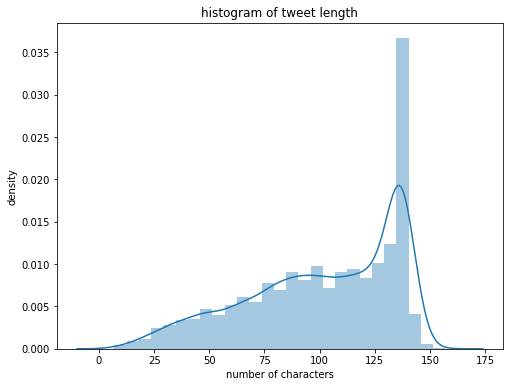

In [15]:
train['tweet_length'] = train['text'].map(len)
plt.figure(figsize=(8,6))
sns.distplot(train['tweet_length'])
plt.title('histogram of tweet length')
plt.xlabel('number of characters')
plt.ylabel('density')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


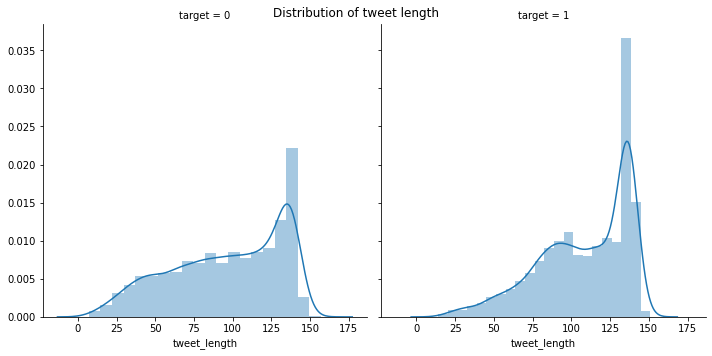

In [16]:
g = sns.FacetGrid(train,col='target',height=5)
g.map(sns.distplot,'tweet_length')
plt.suptitle('Distribution of tweet length')
plt.show()

## Number of words

In [17]:
train['num_words'] = train['text'].apply(lambda x:len(x.split()))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


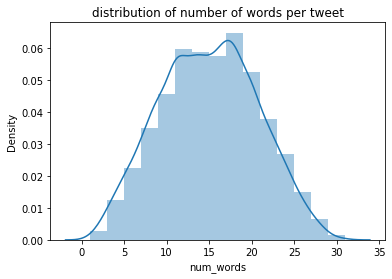

In [18]:
sns.distplot(train['num_words'],bins=15)
plt.title('distribution of number of words per tweet')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


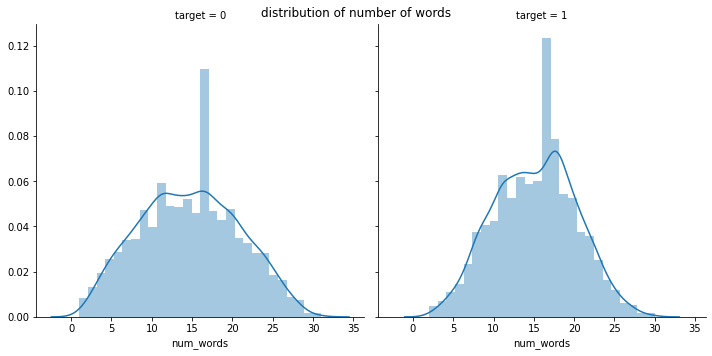

In [19]:
g = sns.FacetGrid(train,col='target',height=5)
g.map(sns.distplot,'num_words')
plt.suptitle('distribution of number of words')
plt.show()

## Average Word Length

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


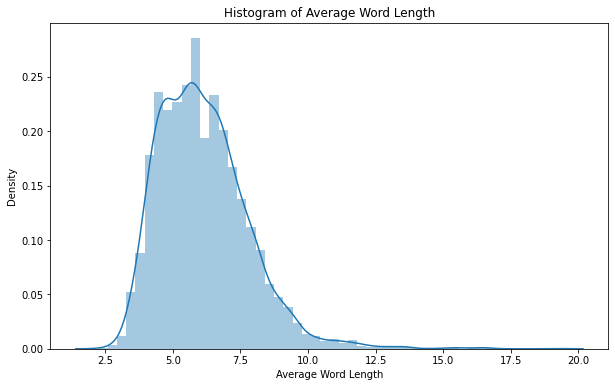

In [20]:
def avg_word_length(x):
    return np.sum([len(w) for w in x.split()]) / len(x.split())

train["avg_word_length"] = train["text"].apply(avg_word_length)
plt.figure(figsize=(10,6))
sns.distplot(train["avg_word_length"])
plt.title("Histogram of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Density")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


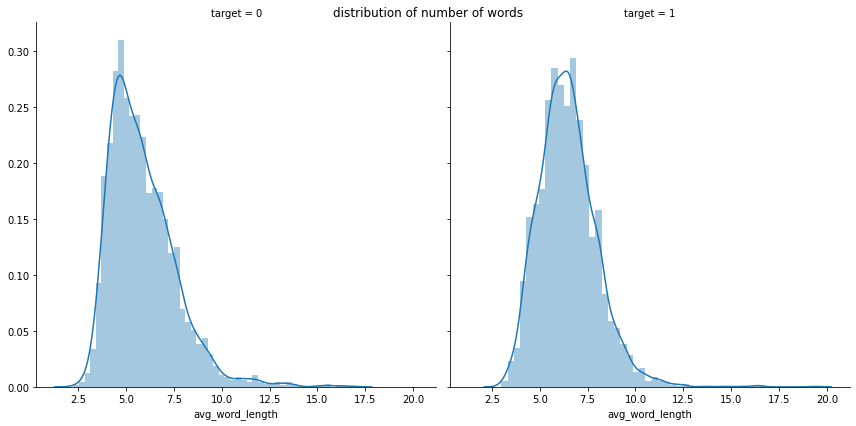

In [21]:
g = sns.FacetGrid(train,col='target',height=6)
g.map(sns.distplot,'avg_word_length')
plt.suptitle('distribution of number of words')
plt.show()

## Target Variable

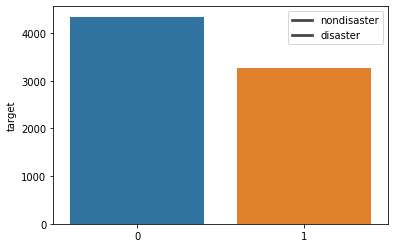

In [22]:
sns.barplot(x=train['target'].value_counts().index,y=train['target'].value_counts())
plt.legend(['nondisaster','disaster'])
plt.show()

# Data Cleaning

In [23]:
train.isnull().mean()

id                 0.000000
keyword            0.008013
location           0.332720
text               0.000000
target             0.000000
tweet_length       0.000000
num_words          0.000000
avg_word_length    0.000000
dtype: float64

In [24]:
train_df = train[['text','target']].copy()
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
import re
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

In [26]:
tweets = []
ps = PorterStemmer()
lm = WordNetLemmatizer()
for i in range(len(train_df)):
    review = re.sub('[^a-zA-Z]',' ',train_df['text'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    tweets.append(review)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [28]:
cv = CountVectorizer(tweets,max_features=5000)
xtrain = cv.fit_transform(tweets).toarray()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident asked shelter place notified officer evacuation shelter place order expected', 'people receive wildfire evacuation order california', 'got sent photo ruby alaska smoke wildfire pours school', 'rockyfire update california hwy closed direction due lake county fire cafire wildfire', 'flood disaster heavy rain cause flash flooding street manitou colorado spring area', 'top hill see fire wood', 'emergency evacuation happening building across street', 'afraid tornado coming area', 'three people died heat wave far', 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding', 'raining flooding florida tampabay tampa day lost count', 'flood bago myanmar arrived bago', 'damage school bus multi car crash breaking', 'man', 'love fruit', 'summer lovely', 'car fast', 'goooo

In [29]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(xtrain,train['target'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [30]:
test_tweets = []
ps = PorterStemmer()
for i in range(len(test)):
    review = re.sub('[^a-zA-Z]',' ',test['text'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    test_tweets.append(review)

In [31]:
xtest = cv.transform(test_tweets).toarray()

In [32]:
predictions = randomclassifier.predict(xtest)

In [33]:
submission = pd.DataFrame({'id':test_id,'target':predictions})
submission.to_csv('submission.csv',index=False)